In [35]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
data1 = pd.read_csv('''spam.csv''',encoding='ISO-8859-1')

In [28]:
df = data1

In [7]:

df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2932,ham,Yo do you know anyone &lt;#&gt; or otherwise...,NaN,NaN,NaN
3431,spam,Camera - You are awarded a SiPix Digital Camer...,NaN,NaN,NaN
2427,ham,Do you think i can move &lt;#&gt; in a week,NaN,NaN,NaN
996,ham,Yetunde i'm in class can you not run water on ...,NaN,NaN,NaN
3857,ham,R u still working now?,NaN,NaN,NaN
3434,ham,\Hi darlin i cantdo anythingtomorrow as mypare...,NaN,NaN,NaN
2167,ham,Yes.he have good crickiting mind,NaN,NaN,NaN
5427,spam,Santa Calling! Would your little ones like a c...,NaN,NaN,NaN
1181,ham,You flippin your shit yet?,NaN,NaN,NaN
5490,ham,K. I will sent it again,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##Data cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df=df.drop(columns=['Unnamed: 2',"Unnamed: 3",'Unnamed: 4'],inplace=False)

In [31]:
df=df.rename(columns={"v1":"target","v2":"text"},inplace=False)


In [16]:
encoder = LabelEncoder()

In [17]:
df['target']=encoder.fit_transform(df['target'])

In [18]:
df.duplicated().sum()

403

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.shape

(5169, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

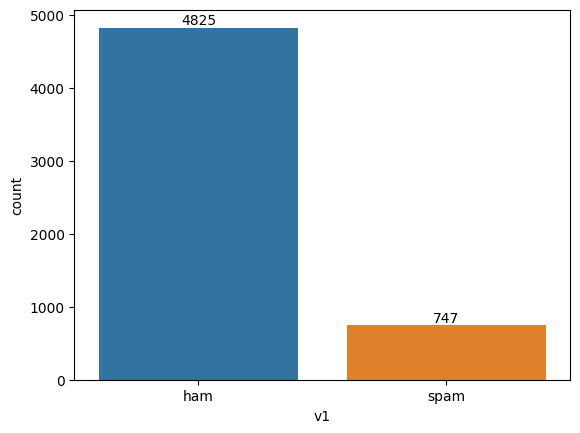

In [29]:
ax=sns.countplot(data=data1, x='v1')
for label in ax.containers:
    ax.bar_label(label)
plt.show

In [32]:
df['num_character']=df['text'].apply(len)

In [38]:
df['total_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #break the sentence  into word by word

In [39]:
#no. of sentences per message
df['total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_character,total_words,total_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [41]:
#ham and spam
df[['num_character','total_words','total_sentence']].describe()

,num_character,total_words,total_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#message containing ham
df[df['target']==0][['num_character','total_words','total_sentence']].describe()

,num_character,total_words,total_sentence
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [43]:
#message conatining spam
df[df['target']==1][['num_character','total_words','total_sentence']].describe()

,num_character,total_words,total_sentence
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


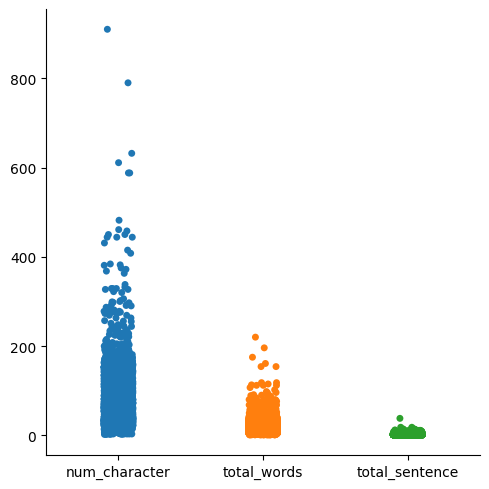

In [44]:
sns.catplot(df)

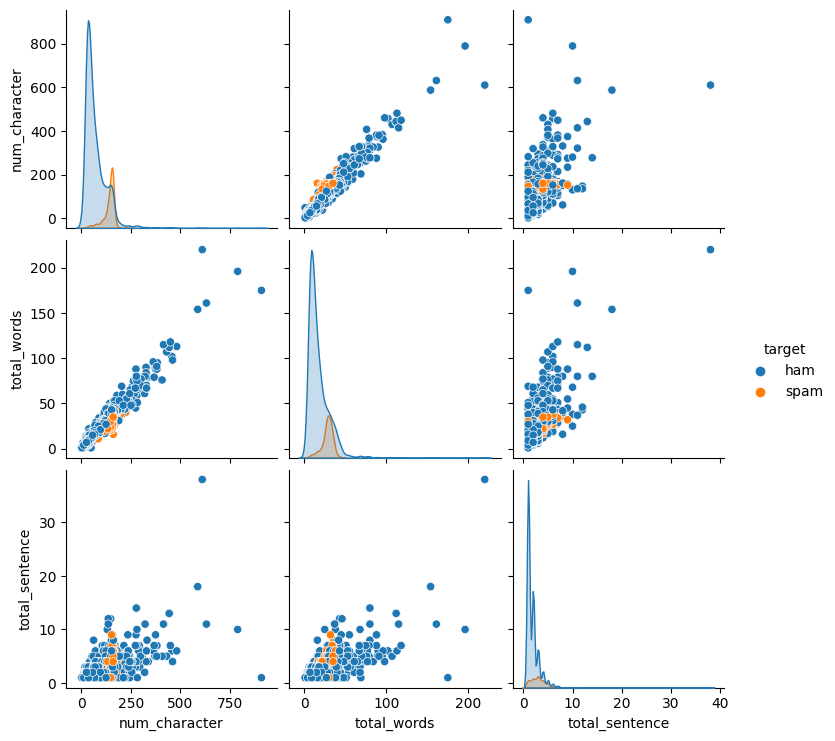

In [48]:
#scatter plot matrix
sns.pairplot(df,hue='target')

<ipython-input-54-fcff8a3647d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='Greens')


<Axes: >

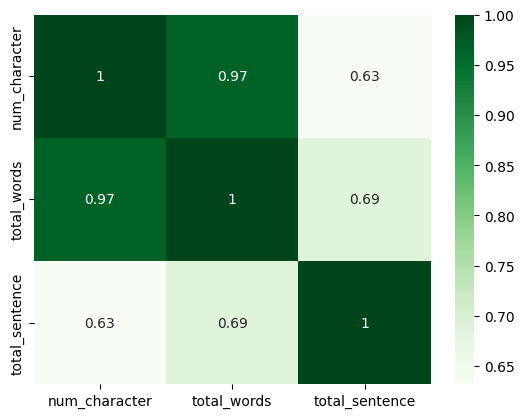

In [54]:
sns.heatmap(df.corr(),annot=True, cmap='Greens')

# **Steps in Data preprocessing**
* convert to lower case
* tokenization
* remove special character
* remove punctuations

In [64]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


def data_processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [65]:
df['new_text']=df['text'].apply(data_processing)

In [57]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_character,total_words,total_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


<function matplotlib.pyplot.show(close=None, block=None)>

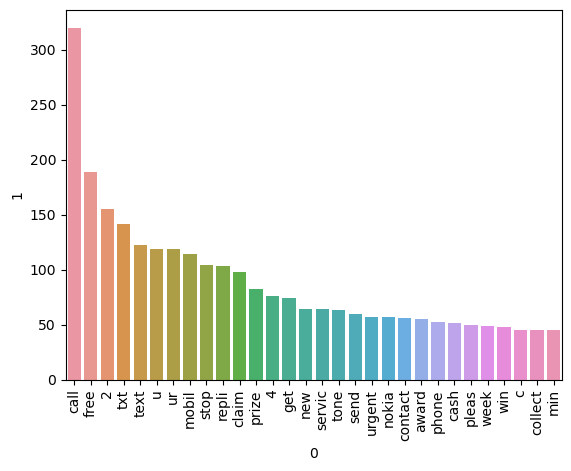

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(list2).most_common(30))[0],y=pd.DataFrame(Counter(list2).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

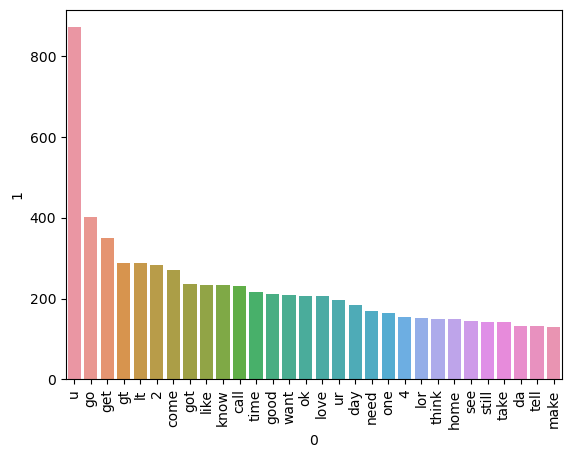

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(list1).most_common(30))[0],y=pd.DataFrame(Counter(list1).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

# **Model Building**

In [60]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [66]:
x= cv.fit_transform(df['new_text']).toarray()
x.shape

(5572, 6708)

In [67]:
y =df['target'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
x_train.shape

(4457, 6708)

In [71]:
x_test.shape

(1115, 6708)

## Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mlnb=MultinomialNB()

# Gaussian naive bayes

In [85]:
gnb.fit(x_train,y_train)
prediction_1 = gnb.predict(x_test)

a1=accuracy_score(y_test,prediction_1)

c1=confusion_matrix(y_test,prediction_1)



print("gnb_accuracy_score:",a1)
print("gnb_confusion_matrix:",c1)



gnb_accuracy_score: 0.8681614349775785
gnb_confusion_matrix: [[844 131]
 [ 16 124]]


# Multinomial Naive Bayes

In [86]:
mlnb.fit(x_train,y_train)
prediction_2 = mlnb.predict(x_test)
#accuracy score
a1=accuracy_score(y_test,prediction_2)
#confusion matrix
c1=confusion_matrix(y_test,prediction_2)


print("mlnb_accuracy_score:",a1)
print("mlnb_confusion_matrix:",c1)

mlnb_accuracy_score: 0.97847533632287
mlnb_confusion_matrix: [[974   1]
 [ 23 117]]


In [78]:
#check precision using tfid
x= tfid.fit_transform(df['new_text']).toarray()

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [87]:
#Gaussian naive_bayes
gnb.fit(x_train,y_train)
prediction_1 = gnb.predict(x_test)
#accuracy score
a1=accuracy_score(y_test,prediction_1)
#confusion matrix
c1=confusion_matrix(y_test,prediction_1)

print("gnb_accuracy_score:",a1)
print("gnb_confusion_matrix:",c1)



gnb_accuracy_score: 0.8681614349775785
gnb_confusion_matrix: [[844 131]
 [ 16 124]]


In [88]:
#multinomial naive_bayes
mlnb.fit(x_train,y_train)
prediction_2 = mlnb.predict(x_test)
#accuracy score
a1=accuracy_score(y_test,prediction_2)
#confusion matrix
c1=confusion_matrix(y_test,prediction_2)

print("mlnb_accuracy_score:",a1)
print("mlnb_confusion_matrix:",c1)

mlnb_accuracy_score: 0.97847533632287
mlnb_confusion_matrix: [[974   1]
 [ 23 117]]


After using tfid, accuracy score for multinomial Naive Bayes is 97.85%. Hence we choose multinomial NB